<a href="https://colab.research.google.com/github/PrajwalKoirala/Offline-Reinforcement-Learning-with-Decision-Tree-Regression/blob/main/Decision_Tree_Policies_Minimal_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!apt-get install -y \
    libgl1-mesa-dev \
    libgl1-mesa-glx \
    libglew-dev \
    libosmesa6-dev \
    software-properties-common \
    patchelf \
    xvfb > /dev/null 2>&1

In [ ]:
!pip install gym==0.21.0 -q
!pip install free-mujoco-py -q
!pip install mujoco -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 21.6 MB/s eta 0:00:00


In [ ]:
# Check if mujoco_py is installed properly
import mujoco_py

Compiling /usr/local/lib/python3.10/dist-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/lib/python3.10/dist-packages/mujoco_py/cymj.pyx


INFO:root:running build_ext
INFO:root:building 'mujoco_py.cymj' extension
INFO:root:creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_310_linuxcpuextensionbuilder
INFO:root:creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_310_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-310
INFO:root:creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_310_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-310/usr
INFO:root:creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_310_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-310/usr/local
INFO:root:creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_310_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-310/usr/local/lib
INFO:root:creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_310_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-31

In [ ]:
# Install D4RL for dataset
!pip install git+https://github.com/Farama-Foundation/d4rl@master#egg=d4rl -q

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.2/626.2 kB 8.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 62.7 MB/s eta 0:00:00


# Import Libraries

In [ ]:
import gym
import d4rl
import numpy as np
import matplotlib.pyplot as plt
import random
import xgboost as xgb

No module named 'flow'
INFO:absl:MUJOCO_GL is not set, so an OpenGL backend will be chosen automatically.
INFO:absl:Failed to import OpenGL backend: glfw
INFO:OpenGL.acceleratesupport:No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
INFO:absl:Successfully imported OpenGL backend: egl
INFO:absl:MuJoCo library version is: 3.2.3
No module named 'carla'
INFO:numexpr.utils:NumExpr defaulting to 2 threads.


# RWDTP

In [ ]:
env = gym.make('walker2d-expert-v2')
all_hyperparams = {
    'discount': 1.0,
    'n_estimators': 100,
    'max_depth': 11,
    'return_power': 2,
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [ ]:
dataset = env.get_dataset()
state_dim = env.observation_space.shape[0]
act_dim = env.action_space.shape[0]
print((state_dim, act_dim))

load datafile: 100%|██████████| 21/21 [00:06<00:00,  3.38it/s]

(17, 6)


## Preprocessing

In [ ]:
observations = dataset['observations']
actions = dataset['actions']
rewards = dataset['rewards']
terminals = dataset['terminals'] + dataset['timeouts']
terminal_ind = np.where(terminals)[0]
if not terminals[-1]:
    terminal_ind = np.concatenate((terminal_ind, np.array([len(terminals)-1])))
start_ind = np.concatenate((np.array([0]), terminal_ind+1))

In [ ]:
observations.shape, actions.shape, rewards.shape, terminals.shape

((1000000, 17), (1000000, 6), (1000000,), (1000000,))

In [ ]:
def discounted_sum(x, gamma):
    y = np.zeros_like(x)
    y[-1] = x[-1]
    for i in reversed(range(len(x) - 1)):
        y[i] = x[i] + gamma * y[i + 1]
    return y

returns = []
gamma = all_hyperparams['discount']
for i in range(len(start_ind) - 1):
    returns.extend(discounted_sum(rewards[start_ind[i]:start_ind[i + 1]], gamma))
returns = np.array(returns).reshape(-1, 1)
X = observations

In [ ]:
norm_return = (returns-np.min(returns))/(np.max(returns)-np.min(returns))
return_power = all_hyperparams['return_power']
norm_return = (norm_return**return_power)
np.max(norm_return), np.min(norm_return), np.mean(norm_return)

(1.0, 0.0, 0.36268798)

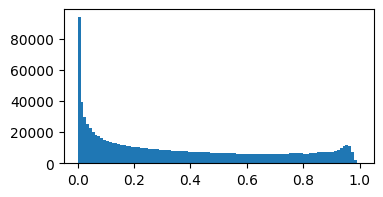

In [ ]:
plt.figure(figsize=(4, 2))
_ = plt.hist(norm_return, bins=100)

## Training

In [ ]:
def loss_fxn(a, mu, rtrn):
    return np.sum(((a-mu)**2) * rtrn)

def custom_objective(_, y_pred):
    mu = y_pred.reshape(-1, act_dim)
    mu = np.clip(mu, -1, 1)
    grad1 = -  (actions - mu)
    grad = grad1 * norm_return
    hess1 = np.ones_like(grad)
    hess = hess1 * norm_return
    print(f"Loss: {loss_fxn(actions, mu, norm_return)}")
    print('___________'*10)
    return grad.reshape(-1), hess.reshape(-1)

In [ ]:
n_estimators = all_hyperparams['n_estimators']
max_depth = all_hyperparams['max_depth']

model = xgb.XGBRegressor(objective=custom_objective, random_state=0, n_estimators=n_estimators, max_depth=max_depth)
model.fit(X, np.ones((actions.shape[0], act_dim)))

Loss: 804710.3125
______________________________________________________________________________________________________________


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:2150: FutureWarning: Since 2.1.0, the shape of the gradient and hessian is required to be (n_samples, n_targets) or (n_samples, n_classes).
  warnings.warn(


Loss: 450874.78125
______________________________________________________________________________________________________________
Loss: 272204.625
______________________________________________________________________________________________________________
Loss: 180611.84375
______________________________________________________________________________________________________________
Loss: 132133.25
______________________________________________________________________________________________________________
Loss: 106256.4921875
______________________________________________________________________________________________________________
Loss: 92293.1171875
______________________________________________________________________________________________________________
Loss: 83707.421875
______________________________________________________________________________________________________________
Loss: 78193.0
______________________________________________________________________________

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None,
             objective=<function custom_objective at 0x7a39d71503a0>, ...)

## Evaluation

In [ ]:
def simulate_episode(env, model, seed=0):
    # state = env.reset(seed=seed)
    env.seed(seed)
    state = env.reset()
    rewards = 0
    max_ep_len = 1000
    for i in range(max_ep_len):
        action = model.predict(state.reshape(1, -1))[0]
        action_mean = action[:act_dim]
        state, reward, terminated, _ = env.step(action_mean)
        rewards += reward
        done = terminated
        if done:
            break
    print(f"Total rewards: {rewards}")
    return rewards, env.get_normalized_score(rewards)

def find_mean_reward(env, model, seeds=[0,1,2,3,4]):
    rewards = []
    normrewards = []
    for i in range(len(seeds)):
        totrew, normrew = simulate_episode(env, model, seed=seeds[i])
        rewards.append(totrew)
        normrewards.append(normrew)
    env.close()
    print(f"Mean Total Rewards: {np.mean(rewards)}")
    return np.mean(normrewards), np.std(normrewards)

In [ ]:
seed_list = [0, 1, 2, 3, 4]
seed_list = [26839, 39876, 89819, 30983, 56399]
seed_list = random.sample(range(100000), 5)
print(f"Seed list: {seed_list}")
mean_reward, std_reward = find_mean_reward(env, model, seeds=seed_list)
print(f"Mean Normalized Rewards: {mean_reward*100}, Std Reward: {std_reward*100}")

Seed list: [37086, 96320, 79127, 9416, 4811]


/usr/local/lib/python3.10/dist-packages/gym/core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


Total rewards: 4967.645544311551
Total rewards: 5000.676125222724
Total rewards: 4984.269547080651
Total rewards: 4915.899905678408
Total rewards: 4990.5973711345105
Mean Total Rewards: 4971.817698685569
Mean Normalized Rewards: 108.26715090989836, Std Reward: 0.6523902432560889


# RCDTP

In [ ]:
env = gym.make('walker2d-expert-v2')
all_hyperparams = {'discount': 1.0, 'n_estimators': 500, 'max_depth': 7, 'rtg': 1.0}

In [ ]:
dataset = env.get_dataset()
state_dim = env.observation_space.shape[0]
act_dim = env.action_space.shape[0]
state_dim, act_dim

load datafile: 100%|██████████| 21/21 [00:02<00:00,  8.30it/s]


(17, 6)

## Preprocessing

In [ ]:
observations = dataset['observations']
actions = dataset['actions']
rewards = dataset['rewards']
terminals = dataset['terminals'] + dataset['timeouts']
terminal_ind = np.where(terminals)[0]
if not terminals[-1]:
    terminal_ind = np.concatenate((terminal_ind, np.array([len(terminals)-1])))
start_ind = np.concatenate((np.array([0]), terminal_ind+1))

In [ ]:
observations.shape, actions.shape, rewards.shape, terminals.shape

((1000000, 17), (1000000, 6), (1000000,), (1000000,))

In [ ]:
def discounted_sum(x, gamma):
    y = np.zeros_like(x)
    y[-1] = x[-1]
    for i in reversed(range(len(x) - 1)):
        y[i] = x[i] + gamma * y[i + 1]
    return y

get_normalized_decrement = lambda x: env.get_normalized_score(x)-env.get_normalized_score(0)
normalized_rewards = get_normalized_decrement(rewards)

In [ ]:
returns = []
timesteps = []
gamma = all_hyperparams['discount']
for i in range(len(start_ind) - 1):
    returns.extend(discounted_sum(normalized_rewards[start_ind[i]:start_ind[i + 1]], gamma))
    timesteps.extend(np.arange(start_ind[i + 1]-start_ind[i]))
returns = np.array(returns).reshape(-1, 1)
timesteps = np.array(timesteps).reshape(-1, 1)
# returns = normalized_rewards.reshape(-1, 1) # for franka kitchen
X = np.concatenate((observations, returns, timesteps), axis=1)

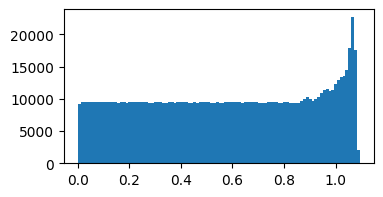

In [ ]:
plt.figure(figsize=(4, 2))
_ = plt.hist(returns, bins=100)

## Training

In [ ]:
n_estimators = all_hyperparams['n_estimators']
max_depth = all_hyperparams['max_depth']

model = xgb.XGBRegressor(objective='reg:squarederror', random_state=0, n_estimators=n_estimators, max_depth=max_depth)
model.fit(X, actions)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

## Evaluation

In [ ]:
def simulate_episode(env, model, target_return=1.0, seed=0):
    # state = env.reset(seed=seed)
    env.seed(seed)
    state = env.reset()
    rewards = 0
    timestep = 0
    max_ep_len = 1000
    for i in range(max_ep_len):
        input_x = np.concatenate(([state], np.array([[target_return]]), np.array([[timestep]])), axis=1)
        action = model.predict(input_x.reshape(1, -1))[0]
        action_mean = action[:act_dim]
        state, reward, terminated, _ = env.step(action_mean)
        rewards += reward
        timestep += 1
        decrement = get_normalized_decrement(reward)
        target_return = max(0.1, target_return - get_normalized_decrement(reward))
        done = terminated
        if done:
            break
    print(f"Total rewards: {rewards}", f"Normalized rewards: {env.get_normalized_score(rewards)}")
    return rewards, env.get_normalized_score(rewards)

def find_mean_reward(env, model, target_return=1.0, seeds=[0,1,2,3,4]):
    rewards = []
    normrewards = []
    for i in range(len(seeds)):
        totrew, normrew = simulate_episode(env, model, target_return=target_return, seed=seeds[i])
        rewards.append(totrew)
        normrewards.append(normrew)
    env.close()
    print(f"Mean Total Rewards: {np.mean(rewards)}")
    return np.mean(normrewards), np.std(normrewards)

In [ ]:
seed_list = [0, 1, 2, 3, 4]
seed_list = [26839, 39876, 89819, 30983, 56399]
seed_list = random.sample(range(10000), 5)
print(f"Seed list: {seed_list}")
mean_reward, std_reward = find_mean_reward(env, model, target_return=all_hyperparams['rtg'], seeds=seed_list)
print(f"Mean Normalized Rewards: {mean_reward*100}, Std Reward: {std_reward*100}")

Seed list: [7852, 8519, 8765, 8344, 4520]
Total rewards: 4971.607852990953 Normalized rewards: 1.0826257977650673
Total rewards: 4936.2234170269385 Normalized rewards: 1.0749178971061706
Total rewards: 4898.313968941308 Normalized rewards: 1.0666599652805848
Total rewards: 4933.864527022125 Normalized rewards: 1.074404052831788
Total rewards: 4955.581710608374 Normalized rewards: 1.0791347738144277
Mean Total Rewards: 4939.11829531794
Mean Normalized Rewards: 107.55484973596077, Std Reward: 0.536027932697961
